Before we get started, a couple of reminders to keep in mind when using iPython notebooks:

- Remember that you can see from the left side of a code cell when it was last run if there is a number within the brackets.
- When you start a new notebook session, make sure you run all of the cells up to the point where you last left off. Even if the output is still visible from when you ran the cells in your previous session, the kernel starts in a fresh state so you'll need to reload the data, etc. on a new session.
- The previous point is useful to keep in mind if your answers do not match what is expected in the lesson's quizzes. Try reloading the data and run all of the processing steps one by one in order to make sure that you are working with the same variables and data that are at each quiz stage.


## Load Data from CSVs

In [33]:
import unicodecsv
import simplejson as json
from datetime import datetime as dt

## pretty printing JSON
def datetime_to_str(dt_obj):
    if isinstance(dt_obj, dt):
        return dt_obj.__str__()

def pprint_json(prefix, json_objs):
    for json_obj in json_objs:
        print prefix, json.dumps(json_obj, indent=2, default=datetime_to_str)

## Longer version of code (replaced with shorter, equivalent version below)

# enrollments = []
# f = open('enrollments.csv', 'rb')
# reader = unicodecsv.DictReader(f)
# for row in reader:
#     enrollments.append(row)
# f.close()

with open('enrollments.csv', 'rb') as f:
    reader = unicodecsv.DictReader(f)
    enrollments = list(reader)

In [34]:
#####################################
#                 1                 #
#####################################

## Read in the data from daily_engagement.csv and project_submissions.csv 
## and store the results in the below variables.
## Then look at the first row of each table.

import unicodecsv

with open('daily_engagement.csv', 'rb') as f:
    reader = unicodecsv.DictReader(f)
    daily_engagement = list(reader)
     
with open('project_submissions.csv', 'rb') as f:
    rows = unicodecsv.DictReader(f)
    project_submissions = list(rows)

pprint_json("daily_engagement:", [daily_engagement[0]])
pprint_json("project_submission:", [project_submissions[0]])
pprint_json("enrollment:", [enrollments[0]])

daily_engagement: {
  "lessons_completed": "0.0",
  "num_courses_visited": "1.0",
  "total_minutes_visited": "11.6793745",
  "projects_completed": "0.0",
  "acct": "0",
  "utc_date": "2015-01-09"
}
project_submission: {
  "lesson_key": "3176718735",
  "processing_state": "EVALUATED",
  "account_key": "256",
  "assigned_rating": "UNGRADED",
  "completion_date": "2015-01-16",
  "creation_date": "2015-01-14"
}
enrollment: {
  "status": "canceled",
  "is_udacity": "True",
  "is_canceled": "True",
  "join_date": "2014-11-10",
  "account_key": "448",
  "cancel_date": "2015-01-14",
  "days_to_cancel": "65"
}


## Fixing Data Types

In [35]:
# Takes a date as a string, and returns a Python datetime object. 
# If there is no date given, returns None
def parse_date(date):
    if date == '':
        return None
    else:
        return dt.strptime(date, '%Y-%m-%d')
    
# Takes a string which is either an empty string or represents an integer,
# and returns an int or None.
def parse_maybe_int(i):
    if i == '':
        return None
    else:
        return int(i)

# Clean up the data types in the enrollments table
for enrollment in enrollments:
    enrollment['cancel_date'] = parse_date(enrollment['cancel_date'])
    enrollment['days_to_cancel'] = parse_maybe_int(enrollment['days_to_cancel'])
    enrollment['is_canceled'] = enrollment['is_canceled'] == 'True'
    enrollment['is_udacity'] = enrollment['is_udacity'] == 'True'
    enrollment['join_date'] = parse_date(enrollment['join_date'])
    
enrollments[0]

{u'account_key': u'448',
 u'cancel_date': datetime.datetime(2015, 1, 14, 0, 0),
 u'days_to_cancel': 65,
 u'is_canceled': True,
 u'is_udacity': True,
 u'join_date': datetime.datetime(2014, 11, 10, 0, 0),
 u'status': u'canceled'}

In [36]:
# Clean up the data types in the engagement table
for engagement_record in daily_engagement:
    engagement_record['lessons_completed'] = int(float(engagement_record['lessons_completed']))
    engagement_record['num_courses_visited'] = int(float(engagement_record['num_courses_visited']))
    engagement_record['projects_completed'] = int(float(engagement_record['projects_completed']))
    engagement_record['total_minutes_visited'] = float(engagement_record['total_minutes_visited'])
    engagement_record['utc_date'] = parse_date(engagement_record['utc_date'])
    
daily_engagement[0]

{u'acct': u'0',
 u'lessons_completed': 0,
 u'num_courses_visited': 1,
 u'projects_completed': 0,
 u'total_minutes_visited': 11.6793745,
 u'utc_date': datetime.datetime(2015, 1, 9, 0, 0)}

In [37]:
# Clean up the data types in the submissions table
for submission in project_submissions:
    submission['completion_date'] = parse_date(submission['completion_date'])
    submission['creation_date'] = parse_date(submission['creation_date'])

project_submissions[0]

{u'account_key': u'256',
 u'assigned_rating': u'UNGRADED',
 u'completion_date': datetime.datetime(2015, 1, 16, 0, 0),
 u'creation_date': datetime.datetime(2015, 1, 14, 0, 0),
 u'lesson_key': u'3176718735',
 u'processing_state': u'EVALUATED'}

Note when running the above cells that we are actively changing the contents of our data variables. If you try to run these cells multiple times in the same session, an error will occur.

## Investigating the Data

In [38]:
#####################################
#                 2                 #
#####################################

## Find the total number of rows and the number of unique students (account keys)
## in each table.

print(len(daily_engagement))
# 136240
print(len(project_submissions))
# 3642
print(len(enrollments))
# 1640

for engagement in daily_engagement:
    engagement["account_key"] = engagement["acct"]
    del engagement["acct"]

def get_unique_students(udacity_data):
    account_keys = {}
    for row in udacity_data:
        account_keys[row["account_key"]] = True
    
    return account_keys

unique_daily_engagement_students = get_unique_students(daily_engagement)
print "# of unique students in daily engagement:", len(unique_daily_engagement_students)
# 1237   

unique_project_submission_students = get_unique_students(project_submissions)
print "# of unique students in project submissions:", len(unique_project_submission_students)
# 743
    
unique_enrollment_students = get_unique_students(enrollments)
print "# of unique students in enrollments:", len(unique_enrollment_students)
# 1302

136240
3642
1640
# of unique students in daily engagement: 1237
# of unique students in project submissions: 743
# of unique students in enrollments: 1302


## Problems in the Data

In [39]:
#####################################
#                 3                 #
#####################################

## Rename the "acct" column in the daily_engagement table to "account_key".

# for engagement in daily_engagement:
#     engagement["account_key"] = engagement["acct"]
#     del engagement["acct"]

## Missing Engagement Records

In [40]:
#####################################
#                 4                 #
#####################################

## Find any one student enrollments where the student is missing from the daily engagement table.
## Output that enrollment.
        
for enrollment in enrollments:
    if enrollment["account_key"] not in unique_daily_engagement_students:
        pprint_json("missing enrollment:", [enrollment])
        break


missing enrollment: {
  "status": "canceled",
  "is_udacity": false,
  "is_canceled": true,
  "join_date": "2014-11-12 00:00:00",
  "account_key": "1219",
  "cancel_date": "2014-11-12 00:00:00",
  "days_to_cancel": 0
}


## Checking for More Problem Records

In [41]:
#####################################
#                 5                 #
#####################################

## Find the number of surprising data points (enrollments missing from
## the engagement table) that remain, if any.
    
num_of_problem_enrollments = 0
problem_enrollment_records = {}

for enrollment in enrollments: 
    if enrollment["account_key"] not in unique_daily_engagement_students and enrollment['days_to_cancel'] != 0:
            problem_enrollment_records[enrollment["account_key"]] = enrollment
            num_of_problem_enrollments +=1
            
pprint_json("problem enrollment_records:", [problem_enrollment_records])
print(len(problem_enrollment_records))
print(num_of_problem_enrollments)
# the inconsistency arises because of multiple enrollments under an account

problem enrollment_record: {
  "1304": {
    "status": "canceled",
    "is_udacity": true,
    "is_canceled": true,
    "join_date": "2015-03-10 00:00:00",
    "account_key": "1304",
    "cancel_date": "2015-06-17 00:00:00",
    "days_to_cancel": 99
  },
  "1101": {
    "status": "current",
    "is_udacity": true,
    "is_canceled": false,
    "join_date": "2015-02-25 00:00:00",
    "account_key": "1101",
    "cancel_date": null,
    "days_to_cancel": null
  }
}
2
3


## Tracking Down the Remaining Problems

In [42]:
# Create a set of the account keys for all Udacity test accounts
udacity_test_accounts = set()
for enrollment in enrollments:
    if enrollment['is_udacity']:
        udacity_test_accounts.add(enrollment['account_key'])
len(udacity_test_accounts)

6

In [43]:
# Given some data with an account_key field, removes any records corresponding to Udacity test accounts
def remove_udacity_accounts(data):
    non_udacity_data = []
    for data_point in data:
        if data_point['account_key'] not in udacity_test_accounts:
            non_udacity_data.append(data_point)
    return non_udacity_data

In [44]:
# Remove Udacity test accounts from all three tables
non_udacity_enrollments = remove_udacity_accounts(enrollments)
non_udacity_engagement = remove_udacity_accounts(daily_engagement)
non_udacity_submissions = remove_udacity_accounts(project_submissions)

print(len(non_udacity_enrollments))
print(len(non_udacity_engagement))
print(len(non_udacity_submissions))

1622
135656
3634


## Refining the Question

In [45]:
#####################################
#                 6                 #
#####################################

## Create a dictionary named paid_students containing all students who either
## haven't canceled yet or who remained enrolled for more than 7 days. The keys
## should be account keys, and the values should be the date the student enrolled.

paid_students = {}

for enrollment in non_udacity_enrollments:
    days_to_cancel = enrollment["days_to_cancel"]
    if days_to_cancel == None or days_to_cancel > 7:
        account_key = enrollment["account_key"]
        enrollment_date = enrollment["join_date"]
        # get student's most recent enrollment
        if account_key not in paid_students or enrollment_date > paid_students[account_key]:
            paid_students[account_key] = enrollment_date

print(len(paid_students))

995


## Getting Data from First Week

In [46]:
# Takes a student's join date and the date of a specific engagement record,
# and returns True if that engagement record happened within one week
# of the student joining.
def within_one_week(join_date, engagement_date):
    time_delta = engagement_date - join_date
    return time_delta.days < 7 and time_delta.days >=0

In [47]:
#####################################
#                 7                 #
#####################################

## Create a list of rows from the engagement table including only rows where
## the student is one of the paid students you just found, and the date is within
## one week of the student's join date.

paid_engagement_in_first_week = []

for engagement in non_udacity_engagement:
    account_key = engagement["account_key"]
    if account_key in paid_students and within_one_week(paid_students[account_key], engagement["utc_date"]):
        paid_engagement_in_first_week.append(engagement)
        
print(len(paid_engagement_in_first_week))

6919


## Exploring Student Engagement

In [48]:
from collections import defaultdict

# Create a dictionary of engagement grouped by student.
# The keys are account keys, and the values are lists of engagement records.
engagement_by_account = defaultdict(list)
for engagement_record in paid_engagement_in_first_week:
    account_key = engagement_record['account_key']
    engagement_by_account[account_key].append(engagement_record)

In [49]:
# Create a dictionary with the total minutes each student spent in the classroom during the first week.
# The keys are account keys, and the values are numbers (total minutes)
    
def grouped_by_account(data, attribute):
    total_by_account = {}
    for account_key, data_for_student in data.items():
        total = 0
        for record in data_for_student:
            total += record[attribute]
        total_by_account[account_key] = total
    return total_by_account

total_minutes_by_account = grouped_by_account(engagement_by_account, "total_minutes_visited")

In [50]:
import numpy as np

# Summarize the data about minutes spent in the classroom
total_minutes = list(total_minutes_by_account.values())
print ('Mean:', np.mean(total_minutes))
print ('Standard deviation:', np.std(total_minutes))
print ('Minimum:', np.min(total_minutes))
print ('Maximum:', np.max(total_minutes))
# max minutes in a week = 10,080

('Mean:', 306.70832675342825)
('Standard deviation:', 412.99693340852957)
('Minimum:', 0.0)
('Maximum:', 3564.7332644989997)


## Debugging Data Analysis Code

In [51]:
#####################################
#                 8                 #
#####################################

## Go through a similar process as before to see if there is a problem.
## Locate at least one surprising piece of data, output it, and take a look at it.

accounts_for_excessive_engagements = []
for account_key, total_minutes in total_minutes_by_account.items():
    if total_minutes > 10080:
        accounts_for_excessive_engagements.append(account_key) 

print("# of accounts with engagement times > week: ", len(accounts_for_excessive_engagements))
print("account keys: ", accounts_for_excessive_engagements)

# problem engagement was for account key 108. Fixed with "time_delta.days >=0" in 
# within_one_week function
print("total minutes: ", total_minutes_by_account['108'])

print("Enrollments: ")
for enrollment in enrollments:
    if enrollment["account_key"] == '108':
        print(enrollment)

print("Engagements: ")        
for engagement in engagement_by_account['108']:
    print(engagement)
        
print("paid_student enrollment date: ", paid_students["108"])

('# of accounts with engagement times > week: ', 0)
('account keys: ', [])
('total minutes: ', 164.27089083347)
Enrollments: 
{u'status': u'canceled', u'is_udacity': False, u'is_canceled': True, u'join_date': datetime.datetime(2015, 1, 7, 0, 0), u'account_key': u'108', u'cancel_date': datetime.datetime(2015, 4, 20, 0, 0), u'days_to_cancel': 103}
{u'status': u'canceled', u'is_udacity': False, u'is_canceled': True, u'join_date': datetime.datetime(2015, 4, 20, 0, 0), u'account_key': u'108', u'cancel_date': datetime.datetime(2015, 5, 14, 0, 0), u'days_to_cancel': 24}
Engagements: 
{u'lessons_completed': 0, u'num_courses_visited': 2, u'total_minutes_visited': 25.9137858334, u'projects_completed': 0, 'account_key': u'108', u'utc_date': datetime.datetime(2015, 4, 20, 0, 0)}
{u'lessons_completed': 0, u'num_courses_visited': 1, u'total_minutes_visited': 3.40682316667, u'projects_completed': 0, 'account_key': u'108', u'utc_date': datetime.datetime(2015, 4, 21, 0, 0)}
{u'lessons_completed': 0, u'

## Lessons Completed in First Week

In [52]:
#####################################
#                 9                 #
#####################################

## Adapt the code above to find the mean, standard deviation, minimum, and maximum for
## the number of lessons completed by each student during the first week. Try creating
## one or more functions to re-use the code above.

total_lessons_completed_by_account = grouped_by_account(engagement_by_account, "lessons_completed")

lessons_completed = list(total_lessons_completed_by_account.values())

print("Mean: ", np.mean(lessons_completed))
print("Standard deviation: ", np.std(lessons_completed))
print("Minimum: ", np.min(lessons_completed))
print("Maximum: ", np.max(lessons_completed))

('Mean: ', 1.636180904522613)
('Standard deviation: ', 3.0025612998294227)
('Minimum: ', 0)
('Maximum: ', 36)


## Number of Visits in First Week

In [53]:
######################################
#                 10                 #
######################################

## Find the mean, standard deviation, minimum, and maximum for the number of
## days each student visits the classroom during the first week.

total_days_by_account = {}

for account_key, engagements in engagement_by_account.items():
    total_days = 0
    for engagement in engagements:
        total_days += 1 if engagement['num_courses_visited'] > 0 else 0
    total_days_by_account[account_key] = total_days    
    
print("Mean:", np.mean(list(total_days_by_account.values())))
print("Standard deviation:", np.std(list(total_days_by_account.values())))
print("Minimum:", np.min(list(total_days_by_account.values())))
print("Maximum:", np.max(list(total_days_by_account.values())))

('Mean:', 2.8673366834170855)
('Standard deviation:', 2.2551980029196814)
('Minimum:', 0)
('Maximum:', 7)


## Splitting out Passing Students

In [54]:
######################################
#                 11                 #
######################################

## Create two lists of engagement data for paid students in the first week.
## The first list should contain data for students who eventually pass the
## subway project, and the second list should contain data for students
## who do not.

subway_project_lesson_keys = ['746169184', '3176718735']

passing_engagement = []
non_passing_engagement = []

# Note: a student can have multiple submissions for a single project, each of which will have
# different assigned_rating

# dictionary with account_keys as keys and lists of subway_submissions as values
submission_by_account = defaultdict(list)
for submission_record in non_udacity_submissions:
    account_key = submission_record["account_key"]
    submission_by_account[account_key].append(submission_record)

# for each entry in the engagement dictionary, find the associated entry in submissions_by_account
# iterate over those submissions and append the engagements to their appropriate list
for account_key, engagements in engagement_by_account.items():
    submissions = submission_by_account[account_key]
    passed = False
    for submission in submissions:
        if submission["lesson_key"] in subway_project_lesson_keys:
            rating = submission["assigned_rating"]
            if rating == "PASSED" or rating == "DISTINCTION":
                passed = True            
    if passed: 
        passing_engagement += engagements
    else:
        non_passing_engagement += engagements
        
print(len(passing_engagement))
print(len(non_passing_engagement))

4527
2392


## Comparing the Two Student Groups

In [55]:
######################################
#                 12                 #
######################################

## Compute some metrics you're interested in and see how they differ for
## students who pass the subway project vs. students who don't. A good
## starting point would be the metrics we looked at earlier (minutes spent
## in the classroom, lessons completed, and days visited).


def group_data_by_account(data, attribute):
    total_by_account = defaultdict(int)
    for datum in data:
        account_key = datum["account_key"]
        total_by_account[account_key] += datum[attribute]
    return total_by_account

def display_data(state, engagements, attribute):
    print state, " Students \n", "Data for week 1: ", attribute
    total_completed_by_account = group_data_by_account(engagements, attribute)
    total_completed = list(total_completed_by_account.values())
    print "Mean:", np.mean(total_completed)
    print "Standard deviation:", np.std(total_completed)
    print "Minimum:", np.min(total_completed)
    print "Maximum:", np.max(total_completed), "\n"

display_data("Passing", passing_engagement, "lessons_completed")
display_data("Non-Passing", non_passing_engagement, "lessons_completed")

display_data("Passing", passing_engagement, "total_minutes_visited")
display_data("Non-Passing", non_passing_engagement, "total_minutes_visited")

def group_days_by_account(engagements):
    total_days_by_account = defaultdict(int)
    total_days = 0
    for engagement in engagements:
        account_key = engagement["account_key"]
        total_days_by_account[account_key] += 1 if engagement["num_courses_visited"] > 0 else 0
    return total_days_by_account

def display_days_visited_data(state, engagements):
    print state, " Students \n", "Data for week 1: days_visited"
    total_days_by_account = group_days_by_account(engagements)
    total_days = list(total_days_by_account.values())   
    print "Mean:", np.mean(total_days)
    print "Standard deviation:", np.std(total_days)
    print "Minimum:", np.min(total_days)
    print "Maximum:", np.max(total_days), "\n"

display_days_visited_data("Passing", passing_engagement)
display_days_visited_data("Non-Passing", non_passing_engagement)

Passing  Students 
Data for week 1:  lessons_completed
Mean: 2.05255023184
Standard deviation: 3.14222705558
Minimum: 0
Maximum: 36 

Non-Passing  Students 
Data for week 1:  lessons_completed
Mean: 0.862068965517
Standard deviation: 2.54915994183
Minimum: 0
Maximum: 27 

Passing  Students 
Data for week 1:  total_minutes_visited
Mean: 394.586046484
Standard deviation: 448.499519327
Minimum: 0.0
Maximum: 3564.7332645 

Non-Passing  Students 
Data for week 1:  total_minutes_visited
Mean: 143.326474267
Standard deviation: 269.538619011
Minimum: 0.0
Maximum: 1768.52274933 

Passing  Students 
Data for week 1: days_visited
Mean: 3.38485316847
Standard deviation: 2.25882147092
Minimum: 0
Maximum: 7 

Non-Passing  Students 
Data for week 1: days_visited
Mean: 1.90517241379
Standard deviation: 1.90573144136
Minimum: 0
Maximum: 7 



## Making Histograms

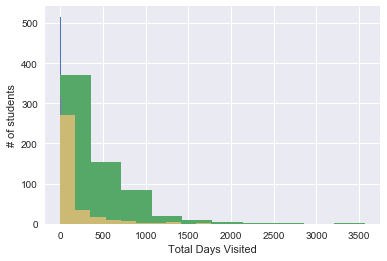

In [56]:
######################################
#                 13                 #
######################################

## Make histograms of the three metrics we looked at earlier for both
## students who passed the subway project and students who didn't. You
## might also want to make histograms of any other metrics you examined.

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

lessons_completed_by_account = group_data_by_account(passing_engagement, "lessons_completed")
lessons_completed = list(lessons_completed_by_account.values())
plt.hist(lessons_completed)
plt.xlabel("Lessons Completed")
plt.ylabel("# of students")

minutes_visited_by_account = group_data_by_account(passing_engagement, "total_minutes_visited")
total_minutes_visited_by_account = list(minutes_visited_by_account.values())
plt.hist(total_minutes_visited_by_account)
plt.xlabel("Total Minutes Visited")
plt.ylabel("# of students")

total_days_visited_by_account = group_days_by_account(passing_engagement)
days_visited = list(total_days_visited_by_account.values())
plt.hist(days_visited)
plt.xlabel("Total Days Visited")
plt.ylabel("# of students")

# NON PASSING
lessons_completed_by_account = group_data_by_account(non_passing_engagement, "lessons_completed")
total_lessons_completed = list(lessons_completed_by_account.values())
plt.hist(total_lessons_completed)
plt.xlabel("Lessons Completed")
plt.ylabel("# of students")

minutes_visited_by_account = group_data_by_account(non_passing_engagement, "total_minutes_visited")
total_minutes_visited = list(minutes_visited_by_account.values())
plt.hist(total_minutes_visited)
plt.xlabel("Total Minutes Visited")
plt.ylabel("# of students")

total_days_visited_by_account = group_days_by_account(non_passing_engagement)
days_visited = list(total_days_visited_by_account.values())
plt.hist(days_visited)
plt.xlabel("Total Days Visited")
plt.ylabel("# of students")

## Improving Plots and Sharing Findings

In [57]:
######################################
#                 14                 #
######################################

## Make a more polished version of at least one of your visualizations
## from earlier. Try importing the seaborn library to make the visualization
## look better, adding axis labels and a title, and changing one or more
## arguments to the hist() function.
